In [16]:
#Bliotecas Padrão
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Keras - CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

#Bibliotecas Adicionais
import seaborn as sns #Grafico
from pathlib import Path #Diretorio
from tqdm import tqdm #Barra de Progressao

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2
from sklearn.metrics import max_error as MAXE
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = loadmat(f'Sim_Code-Data\dispersionpoints2048.mat')
print(data.keys())

data_lambda = data['lamda1']

#First and last run preview
print('\n===== Sample Simulação # 1 =====')
display(data_lambda[:,:,0])
display(data_lambda.shape)

print('\n===== Sample Simulação # 100 =====')
display(data_lambda[:,:,99])

#Espessura
print('\n===== Preview Espessura =====')
ESP = data['ESP'].reshape(-1,)
print(ESP.shape)
display(ESP)

#frequências normalizadas
x1 = data['x1']
print(f'Dimensao do Parametro X :{x1.shape}')
display(x1)

dict_keys(['__header__', '__version__', '__globals__', 'ESP', 'lamda1', 'x1'])

===== Sample Simulação # 1 =====


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.68424850e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.33633598e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.21336062e+00, 1.02555310e+00, 1.02150318e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.21492907e+00, 1.02635696e+00, 1.02229426e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.21649627e+00, 1.02716038e+00, 1.02308477e+00]])

(2048, 66, 100)


===== Sample Simulação # 100 =====


array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 5.06806211e-253, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 1.01322291e-252, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.77669752e-001, 7.00532590e-001, 6.77786707e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.78763138e-001, 7.03245867e-001, 6.79364437e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.79856987e-001, 7.05950036e-001, 6.80930830e-001]])


===== Preview Espessura =====
(100,)


array([0.03  , 0.0298, 0.0296, 0.0294, 0.0292, 0.029 , 0.0288, 0.0286,
       0.0284, 0.0282, 0.028 , 0.0278, 0.0276, 0.0274, 0.0272, 0.027 ,
       0.0268, 0.0266, 0.0264, 0.0262, 0.026 , 0.0258, 0.0256, 0.0254,
       0.0252, 0.025 , 0.0248, 0.0246, 0.0244, 0.0242, 0.024 , 0.0238,
       0.0236, 0.0234, 0.0232, 0.023 , 0.0228, 0.0226, 0.0224, 0.0222,
       0.022 , 0.0218, 0.0216, 0.0214, 0.0212, 0.021 , 0.0208, 0.0206,
       0.0204, 0.0202, 0.02  , 0.0198, 0.0196, 0.0194, 0.0192, 0.019 ,
       0.0188, 0.0186, 0.0184, 0.0182, 0.018 , 0.0178, 0.0176, 0.0174,
       0.0172, 0.017 , 0.0168, 0.0166, 0.0164, 0.0162, 0.016 , 0.0158,
       0.0156, 0.0154, 0.0152, 0.015 , 0.0148, 0.0146, 0.0144, 0.0142,
       0.014 , 0.0138, 0.0136, 0.0134, 0.0132, 0.013 , 0.0128, 0.0126,
       0.0124, 0.0122, 0.012 , 0.0118, 0.0116, 0.0114, 0.0112, 0.011 ,
       0.0108, 0.0106, 0.0104, 0.0102])

Dimensao do Parametro X :(2048, 100)


array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e-03, 3.000e-03, 3.000e-03, ..., 3.000e-03, 3.000e-03,
        3.000e-03],
       [6.000e-03, 6.000e-03, 6.000e-03, ..., 6.000e-03, 6.000e-03,
        6.000e-03],
       ...,
       [6.135e+00, 6.135e+00, 6.135e+00, ..., 6.135e+00, 6.135e+00,
        6.135e+00],
       [6.138e+00, 6.138e+00, 6.138e+00, ..., 6.138e+00, 6.138e+00,
        6.138e+00],
       [6.141e+00, 6.141e+00, 6.141e+00, ..., 6.141e+00, 6.141e+00,
        6.141e+00]])

In [3]:
df_lambda_slice = pd.DataFrame(data_lambda[:,23:39,50], columns = range(23,39))
df_lambda_slice.describe()

,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,2048.0,2048.0,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,0.0,0.0,9.773481e-41,3.318043e-11,1.042389e-114,3.669668e-16,0.025251,0.057179,0.037640,0.029627,0.065463,0.059441,0.062749,0.107122,0.066910,0.039830
std,0.0,0.0,4.406977e-39,1.501575e-09,4.717316e-113,1.655155e-14,0.227238,0.326340,0.263509,0.231674,0.334037,0.309818,0.322829,0.426687,0.323822,0.245804
min,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,1.994360e-37,6.795351e-08,2.134813e-111,7.490347e-13,2.097983,2.073097,2.075089,2.013293,2.007306,2.093007,2.045202,2.094002,1.926496,2.019278


In [17]:
X_scaller = MinMaxScaler()
X_scaled = X_scaller.fit_transform(x)

y_scaller = MinMaxScaler()
y_scaled = y_scaller.fit_transform(ESP)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

## CNN

#### Treino e Validação do Modelo CNN

In [4]:
x = np.transpose(data_lambda, (2, 0, 1))
print(x.shape)

x = x[:,:,34:]
print(x.shape)

x = x.reshape(-1,256,256)
print(x.shape)

X_train = x[:80,:,:]
y_train = ESP[0:80]

X_test = x[80:,:,:]
y_test = ESP[80:]

print("Shape do conjunto de treino X: ", X_train.shape)
print("Shape do conjunto de treino X: ", X_test.shape)

print("Shape do conjunto de treino Y: ", y_train.shape)
print("Shape do conjunto de treino Y: ", y_test.shape)

(100, 2048, 66)
(100, 2048, 32)
(100, 256, 256)
Shape do conjunto de treino X:  (80, 256, 256)
Shape do conjunto de treino X:  (20, 256, 256)
Shape do conjunto de treino Y:  (80,)
Shape do conjunto de treino Y:  (20,)


In [5]:
#Criação do modelo
#model = keras.Sequential()
Historico = []
#Adição da camada de convolução
kernel_size = 32 #entre 85 e 90 o maximo
max_pooling = 6 #entre 6 e 7 o maximo
r_best = -9999

for conv_filter  in [6,10,20,30]:
    for kernel_size in [5,16,32]:
        for max_pooling in [2,4,6]:
            
            print(f'\n ##### conv_filter: {conv_filter} ######## kernel_size: {kernel_size}  ########## max_pooling: {max_pooling} ########')
            
            model = keras.Sequential()
            model.add(keras.layers.Conv2D(30, (kernel_size,kernel_size), activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))

            #Adição da camada de pooling
            model.add(keras.layers.MaxPooling2D((max_pooling,max_pooling)))

            #Adição de mais camadas de convolução e pooling (opcional)
            model.add(keras.layers.Conv2D(30, (kernel_size,kernel_size), activation='relu'))
            model.add(keras.layers.MaxPooling2D((max_pooling,max_pooling)))

            #Adição da camada fully connected para classificação
            model.add(keras.layers.Flatten())
            model.add(keras.layers.Dense(120, activation='relu'))
            model.add(keras.layers.Dense(84, activation='relu'))
            model.add(keras.layers.Dense(1))

            #model.summary()

            #Compilação do modelo
            model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

            #Adição do callback de early stopping
            early_stopping = EarlyStopping(monitor='val_loss', patience=8)

            #Treinamento do modelo
            history = model.fit(X_train, y_train, validation_split = 0.2, verbose = 1, epochs=64, callbacks=[early_stopping])
            
            y_hat = model.predict(X_test)
            
            Historico.append([[conv_filter, kernel_size, max_pooling], MSE(y_test,y_hat)**0.5, MSE(y_test,y_hat), MAXE(y_test,y_hat), r2(y_test,y_hat)])
            
            if r2(y_test,y_hat) > r_best:
                best_model = model
                best_tunning = [conv_filter, kernel_size, max_pooling]
                r_best = r2(y_test,y_hat)
                best_history = history

# Guardar el Modelo
best_model.save('best_model_2048.h5')


 ##### conv_filter: 6 ######## kernel_size: 5  ########## max_pooling: 2 ########
Epoch 1/64
2/2 [==============================] - 3s 948ms/step - loss: 178.0924 - mean_absolute_error: 9.5016 - val_loss: 1.8008 - val_mean_absolute_error: 1.3415
Epoch 2/64
2/2 [==============================] - 2s 804ms/step - loss: 4.0438 - mean_absolute_error: 1.9136 - val_loss: 2.9835 - val_mean_absolute_error: 1.7272
Epoch 3/64
2/2 [==============================] - 2s 844ms/step - loss: 1.9688 - mean_absolute_error: 1.3647 - val_loss: 0.3785 - val_mean_absolute_error: 0.6151
Epoch 4/64
2/2 [==============================] - 2s 828ms/step - loss: 0.2318 - mean_absolute_error: 0.4594 - val_loss: 0.0176 - val_mean_absolute_error: 0.1326
Epoch 5/64
2/2 [==============================] - 2s 823ms/step - loss: 0.0082 - mean_absolute_error: 0.0758 - val_loss: 0.0103 - val_mean_absolute_error: 0.1013
Epoch 6/64
2/2 [==============================] - 2s 827ms/step - loss: 0.0183 - mean_absolute_error: 0.1

2/2 [==============================] - 1s 402ms/step - loss: 0.0023 - mean_absolute_error: 0.0466 - val_loss: 2.1609e-04 - val_mean_absolute_error: 0.0144
Epoch 6/64
2/2 [==============================] - 1s 388ms/step - loss: 3.1211e-04 - mean_absolute_error: 0.0161 - val_loss: 2.7915e-05 - val_mean_absolute_error: 0.0043
Epoch 7/64
2/2 [==============================] - 1s 419ms/step - loss: 2.1815e-05 - mean_absolute_error: 0.0039 - val_loss: 1.8107e-04 - val_mean_absolute_error: 0.0129
Epoch 8/64
2/2 [==============================] - 1s 407ms/step - loss: 8.7889e-05 - mean_absolute_error: 0.0087 - val_loss: 2.1622e-04 - val_mean_absolute_error: 0.0140
Epoch 9/64
2/2 [==============================] - 1s 410ms/step - loss: 8.5781e-05 - mean_absolute_error: 0.0085 - val_loss: 1.3539e-04 - val_mean_absolute_error: 0.0106
Epoch 10/64
2/2 [==============================] - 1s 417ms/step - loss: 3.4161e-05 - mean_absolute_error: 0.0048 - val_loss: 4.9084e-05 - val_mean_absolute_error: 0

2/2 [==============================] - 10s 5s/step - loss: 2.4472e-05 - mean_absolute_error: 0.0039 - val_loss: 9.5243e-05 - val_mean_absolute_error: 0.0097
Epoch 11/64
2/2 [==============================] - 10s 5s/step - loss: 2.8051e-05 - mean_absolute_error: 0.0041 - val_loss: 2.9972e-06 - val_mean_absolute_error: 0.0014
Epoch 12/64
2/2 [==============================] - 9s 5s/step - loss: 3.2548e-05 - mean_absolute_error: 0.0047 - val_loss: 3.7024e-06 - val_mean_absolute_error: 0.0015
Epoch 13/64
2/2 [==============================] - 10s 5s/step - loss: 1.7261e-05 - mean_absolute_error: 0.0034 - val_loss: 4.8638e-05 - val_mean_absolute_error: 0.0068
Epoch 14/64
2/2 [==============================] - 9s 5s/step - loss: 2.1531e-05 - mean_absolute_error: 0.0036 - val_loss: 1.7050e-05 - val_mean_absolute_error: 0.0039
Epoch 15/64
2/2 [==============================] - 10s 5s/step - loss: 7.7921e-06 - mean_absolute_error: 0.0020 - val_loss: 5.4281e-06 - val_mean_absolute_error: 0.0022


2/2 [==============================] - 10s 5s/step - loss: 3.9452e-07 - mean_absolute_error: 5.1827e-04 - val_loss: 1.3424e-06 - val_mean_absolute_error: 9.5174e-04
Epoch 58/64
2/2 [==============================] - 10s 5s/step - loss: 4.0593e-07 - mean_absolute_error: 5.2318e-04 - val_loss: 4.3463e-07 - val_mean_absolute_error: 5.0371e-04
Epoch 59/64
2/2 [==============================] - 10s 5s/step - loss: 2.2743e-07 - mean_absolute_error: 3.8489e-04 - val_loss: 7.1962e-07 - val_mean_absolute_error: 6.8854e-04
Epoch 60/64
2/2 [==============================] - 10s 5s/step - loss: 1.5289e-07 - mean_absolute_error: 3.0800e-04 - val_loss: 4.7405e-07 - val_mean_absolute_error: 5.3668e-04
Epoch 61/64
2/2 [==============================] - 10s 5s/step - loss: 1.3768e-07 - mean_absolute_error: 2.8399e-04 - val_loss: 7.4273e-07 - val_mean_absolute_error: 7.0279e-04
Epoch 62/64
2/2 [==============================] - 10s 5s/step - loss: 1.6604e-07 - mean_absolute_error: 3.3207e-04 - val_loss:

2/2 [==============================] - 3s 2s/step - loss: 3.0054e-05 - mean_absolute_error: 0.0042 - val_loss: 1.1391e-05 - val_mean_absolute_error: 0.0029
Epoch 20/64
2/2 [==============================] - 3s 2s/step - loss: 3.1051e-05 - mean_absolute_error: 0.0042 - val_loss: 1.6750e-05 - val_mean_absolute_error: 0.0034
Epoch 21/64
2/2 [==============================] - 3s 2s/step - loss: 2.5591e-05 - mean_absolute_error: 0.0039 - val_loss: 3.1734e-05 - val_mean_absolute_error: 0.0047
Epoch 22/64
2/2 [==============================] - 3s 2s/step - loss: 2.8064e-05 - mean_absolute_error: 0.0043 - val_loss: 2.7498e-05 - val_mean_absolute_error: 0.0044
Epoch 23/64
2/2 [==============================] - 3s 2s/step - loss: 2.5112e-05 - mean_absolute_error: 0.0038 - val_loss: 1.5449e-05 - val_mean_absolute_error: 0.0033
Epoch 24/64
2/2 [==============================] - 3s 2s/step - loss: 2.5425e-05 - mean_absolute_error: 0.0037 - val_loss: 1.3458e-05 - val_mean_absolute_error: 0.0032
Epoc

2/2 [==============================] - 16s 8s/step - loss: 2.1763e-05 - mean_absolute_error: 0.0039 - val_loss: 8.9629e-05 - val_mean_absolute_error: 0.0094
Epoch 10/64
2/2 [==============================] - 18s 9s/step - loss: 2.0771e-05 - mean_absolute_error: 0.0037 - val_loss: 1.7875e-04 - val_mean_absolute_error: 0.0133
Epoch 11/64
2/2 [==============================] - 18s 9s/step - loss: 5.0572e-05 - mean_absolute_error: 0.0061 - val_loss: 2.4887e-04 - val_mean_absolute_error: 0.0157
Epoch 12/64
2/2 [==============================] - 18s 9s/step - loss: 7.8579e-05 - mean_absolute_error: 0.0080 - val_loss: 2.7391e-04 - val_mean_absolute_error: 0.0165
Epoch 13/64
2/2 [==============================] - 18s 9s/step - loss: 8.4658e-05 - mean_absolute_error: 0.0084 - val_loss: 2.5137e-04 - val_mean_absolute_error: 0.0158
Epoch 14/64
2/2 [==============================] - 17s 9s/step - loss: 6.9104e-05 - mean_absolute_error: 0.0075 - val_loss: 2.0157e-04 - val_mean_absolute_error: 0.014

2/2 [==============================] - 1s 359ms/step - loss: 0.0035 - mean_absolute_error: 0.0540 - val_loss: 2.8616e-04 - val_mean_absolute_error: 0.0143
Epoch 7/64
2/2 [==============================] - 1s 339ms/step - loss: 0.0015 - mean_absolute_error: 0.0336 - val_loss: 0.0047 - val_mean_absolute_error: 0.0676
Epoch 8/64
2/2 [==============================] - 1s 343ms/step - loss: 0.0018 - mean_absolute_error: 0.0373 - val_loss: 6.5614e-04 - val_mean_absolute_error: 0.0232
Epoch 9/64
2/2 [==============================] - 1s 342ms/step - loss: 0.0020 - mean_absolute_error: 0.0409 - val_loss: 1.8889e-04 - val_mean_absolute_error: 0.0110
Epoch 10/64
2/2 [==============================] - 1s 334ms/step - loss: 0.0011 - mean_absolute_error: 0.0281 - val_loss: 0.0020 - val_mean_absolute_error: 0.0436
Epoch 11/64
2/2 [==============================] - 1s 330ms/step - loss: 8.9430e-04 - mean_absolute_error: 0.0250 - val_loss: 4.2796e-04 - val_mean_absolute_error: 0.0177
Epoch 12/64
2/2 [

Epoch 19/64
2/2 [==============================] - 10s 5s/step - loss: 3.9169e-05 - mean_absolute_error: 0.0050 - val_loss: 1.6741e-05 - val_mean_absolute_error: 0.0040
Epoch 20/64
1/1 [==============================] - 0s 257ms/step

 ##### conv_filter: 10 ######## kernel_size: 16  ########## max_pooling: 4 ########
Epoch 1/64
2/2 [==============================] - 5s 2s/step - loss: 9.6312 - mean_absolute_error: 2.2213 - val_loss: 0.1483 - val_mean_absolute_error: 0.3850
Epoch 2/64
2/2 [==============================] - 5s 2s/step - loss: 0.0681 - mean_absolute_error: 0.2178 - val_loss: 0.0108 - val_mean_absolute_error: 0.1036
Epoch 3/64
2/2 [==============================] - 5s 2s/step - loss: 0.0093 - mean_absolute_error: 0.0941 - val_loss: 2.2151e-05 - val_mean_absolute_error: 0.0040
Epoch 4/64
2/2 [==============================] - 5s 2s/step - loss: 6.8435e-04 - mean_absolute_error: 0.0231 - val_loss: 0.0038 - val_mean_absolute_error: 0.0612
Epoch 5/64
2/2 [=====================

Epoch 33/64
2/2 [==============================] - 4s 2s/step - loss: 2.9720e-05 - mean_absolute_error: 0.0041 - val_loss: 1.2655e-05 - val_mean_absolute_error: 0.0026
Epoch 34/64
2/2 [==============================] - 4s 2s/step - loss: 2.5144e-05 - mean_absolute_error: 0.0039 - val_loss: 2.1230e-05 - val_mean_absolute_error: 0.0039
Epoch 35/64
1/1 [==============================] - 0s 125ms/step

 ##### conv_filter: 10 ######## kernel_size: 32  ########## max_pooling: 2 ########
Epoch 1/64
2/2 [==============================] - 29s 15s/step - loss: 710.2625 - mean_absolute_error: 18.8623 - val_loss: 0.0016 - val_mean_absolute_error: 0.0394
Epoch 2/64
2/2 [==============================] - 28s 14s/step - loss: 0.0021 - mean_absolute_error: 0.0411 - val_loss: 1.4573e-04 - val_mean_absolute_error: 0.0120
Epoch 3/64
2/2 [==============================] - 29s 15s/step - loss: 3.4696e-04 - mean_absolute_error: 0.0182 - val_loss: 3.4196e-05 - val_mean_absolute_error: 0.0058
Epoch 4/64
2/2 [

2/2 [==============================] - 18s 9s/step - loss: 6.9606e-05 - mean_absolute_error: 0.0075 - val_loss: 2.2936e-04 - val_mean_absolute_error: 0.0151
Epoch 15/64
2/2 [==============================] - 18s 9s/step - loss: 6.0466e-05 - mean_absolute_error: 0.0069 - val_loss: 1.9358e-04 - val_mean_absolute_error: 0.0139
Epoch 16/64
1/1 [==============================] - 0s 481ms/step

 ##### conv_filter: 20 ######## kernel_size: 5  ########## max_pooling: 2 ########
Epoch 1/64
2/2 [==============================] - 4s 2s/step - loss: 164.2626 - mean_absolute_error: 9.0799 - val_loss: 5.8082 - val_mean_absolute_error: 2.4098
Epoch 2/64
2/2 [==============================] - 3s 1s/step - loss: 3.0990 - mean_absolute_error: 1.3231 - val_loss: 0.0747 - val_mean_absolute_error: 0.2732
Epoch 3/64
2/2 [==============================] - 3s 2s/step - loss: 0.0686 - mean_absolute_error: 0.2602 - val_loss: 0.0158 - val_mean_absolute_error: 0.1256
Epoch 4/64
2/2 [==============================

Epoch 10/64
2/2 [==============================] - 1s 420ms/step - loss: 4.3960e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0024 - val_mean_absolute_error: 0.0482
Epoch 11/64
2/2 [==============================] - 1s 370ms/step - loss: 0.0016 - mean_absolute_error: 0.0378 - val_loss: 0.0018 - val_mean_absolute_error: 0.0423
Epoch 12/64
2/2 [==============================] - 1s 383ms/step - loss: 5.1098e-04 - mean_absolute_error: 0.0197 - val_loss: 2.8481e-05 - val_mean_absolute_error: 0.0042
Epoch 13/64
2/2 [==============================] - 1s 391ms/step - loss: 5.3394e-04 - mean_absolute_error: 0.0207 - val_loss: 1.7882e-04 - val_mean_absolute_error: 0.0124
Epoch 14/64
2/2 [==============================] - 1s 392ms/step - loss: 5.6435e-04 - mean_absolute_error: 0.0215 - val_loss: 2.4972e-04 - val_mean_absolute_error: 0.0150
Epoch 15/64
2/2 [==============================] - 1s 426ms/step - loss: 1.6745e-04 - mean_absolute_error: 0.0105 - val_loss: 0.0014 - val_mean_absolute_erro

2/2 [==============================] - 5s 3s/step - loss: 2.0255e-05 - mean_absolute_error: 0.0038 - val_loss: 5.2367e-05 - val_mean_absolute_error: 0.0072
Epoch 17/64
2/2 [==============================] - 5s 2s/step - loss: 1.4064e-05 - mean_absolute_error: 0.0030 - val_loss: 8.5081e-05 - val_mean_absolute_error: 0.0092
Epoch 18/64
2/2 [==============================] - 5s 3s/step - loss: 1.8795e-05 - mean_absolute_error: 0.0033 - val_loss: 1.0652e-04 - val_mean_absolute_error: 0.0103
Epoch 19/64
2/2 [==============================] - 5s 2s/step - loss: 2.5071e-05 - mean_absolute_error: 0.0040 - val_loss: 1.0944e-04 - val_mean_absolute_error: 0.0104
Epoch 20/64
2/2 [==============================] - 5s 2s/step - loss: 2.5078e-05 - mean_absolute_error: 0.0041 - val_loss: 9.9323e-05 - val_mean_absolute_error: 0.0099
Epoch 21/64
1/1 [==============================] - 0s 133ms/step

 ##### conv_filter: 20 ######## kernel_size: 16  ########## max_pooling: 6 ########
Epoch 1/64
2/2 [======

2/2 [==============================] - 39s 20s/step - loss: 4.5423e-05 - mean_absolute_error: 0.0057 - val_loss: 1.8819e-04 - val_mean_absolute_error: 0.0137
Epoch 18/64
1/1 [==============================] - 2s 2s/step

 ##### conv_filter: 20 ######## kernel_size: 32  ########## max_pooling: 4 ########
Epoch 1/64
2/2 [==============================] - 21s 10s/step - loss: 4.8233 - mean_absolute_error: 1.5948 - val_loss: 0.4740 - val_mean_absolute_error: 0.6884
Epoch 2/64
2/2 [==============================] - 21s 11s/step - loss: 0.2420 - mean_absolute_error: 0.4128 - val_loss: 7.1895e-05 - val_mean_absolute_error: 0.0082
Epoch 3/64
2/2 [==============================] - 20s 10s/step - loss: 1.6116e-04 - mean_absolute_error: 0.0122 - val_loss: 1.2623e-04 - val_mean_absolute_error: 0.0111
Epoch 4/64
2/2 [==============================] - 19s 10s/step - loss: 4.7042e-04 - mean_absolute_error: 0.0212 - val_loss: 3.0113e-04 - val_mean_absolute_error: 0.0173
Epoch 5/64
2/2 [===============

Epoch 6/64
2/2 [==============================] - 3s 1s/step - loss: 0.0174 - mean_absolute_error: 0.1291 - val_loss: 0.0038 - val_mean_absolute_error: 0.0613
Epoch 7/64
2/2 [==============================] - 3s 1s/step - loss: 0.0035 - mean_absolute_error: 0.0558 - val_loss: 1.2186e-04 - val_mean_absolute_error: 0.0107
Epoch 8/64
2/2 [==============================] - 2s 1s/step - loss: 1.5487e-04 - mean_absolute_error: 0.0103 - val_loss: 3.1610e-04 - val_mean_absolute_error: 0.0176
Epoch 9/64
2/2 [==============================] - 2s 1s/step - loss: 5.1378e-04 - mean_absolute_error: 0.0215 - val_loss: 7.1690e-04 - val_mean_absolute_error: 0.0267
Epoch 10/64
2/2 [==============================] - 2s 1s/step - loss: 7.5525e-04 - mean_absolute_error: 0.0265 - val_loss: 5.8697e-04 - val_mean_absolute_error: 0.0241
Epoch 11/64
2/2 [==============================] - 2s 1s/step - loss: 5.6567e-04 - mean_absolute_error: 0.0225 - val_loss: 3.8116e-04 - val_mean_absolute_error: 0.0194
Epoch 12

2/2 [==============================] - 1s 335ms/step - loss: 0.0030 - mean_absolute_error: 0.0431 - val_loss: 0.0039 - val_mean_absolute_error: 0.0623
Epoch 5/64
2/2 [==============================] - 1s 383ms/step - loss: 0.0035 - mean_absolute_error: 0.0576 - val_loss: 0.0060 - val_mean_absolute_error: 0.0769
Epoch 6/64
2/2 [==============================] - 1s 372ms/step - loss: 0.0039 - mean_absolute_error: 0.0617 - val_loss: 0.0038 - val_mean_absolute_error: 0.0613
Epoch 7/64
2/2 [==============================] - 1s 377ms/step - loss: 0.0019 - mean_absolute_error: 0.0419 - val_loss: 0.0014 - val_mean_absolute_error: 0.0375
Epoch 8/64
2/2 [==============================] - 1s 350ms/step - loss: 3.9363e-04 - mean_absolute_error: 0.0174 - val_loss: 3.3904e-04 - val_mean_absolute_error: 0.0176
Epoch 9/64
2/2 [==============================] - 1s 361ms/step - loss: 1.0051e-04 - mean_absolute_error: 0.0077 - val_loss: 6.6187e-05 - val_mean_absolute_error: 0.0064
Epoch 10/64
2/2 [======

2/2 [==============================] - 5s 2s/step - loss: 4.6488e-05 - mean_absolute_error: 0.0053 - val_loss: 3.3524e-05 - val_mean_absolute_error: 0.0046
Epoch 17/64
2/2 [==============================] - 5s 2s/step - loss: 4.3335e-05 - mean_absolute_error: 0.0052 - val_loss: 1.7293e-05 - val_mean_absolute_error: 0.0032
Epoch 18/64
2/2 [==============================] - 5s 2s/step - loss: 2.5235e-05 - mean_absolute_error: 0.0037 - val_loss: 1.1251e-05 - val_mean_absolute_error: 0.0030
Epoch 19/64
2/2 [==============================] - 5s 2s/step - loss: 1.6817e-05 - mean_absolute_error: 0.0031 - val_loss: 1.7138e-05 - val_mean_absolute_error: 0.0035
Epoch 20/64
2/2 [==============================] - 5s 2s/step - loss: 1.8227e-05 - mean_absolute_error: 0.0033 - val_loss: 2.3592e-05 - val_mean_absolute_error: 0.0041
Epoch 21/64
2/2 [==============================] - 5s 2s/step - loss: 1.7132e-05 - mean_absolute_error: 0.0030 - val_loss: 2.0502e-05 - val_mean_absolute_error: 0.0039
Epoc

2/2 [==============================] - 21s 11s/step - loss: 0.0016 - mean_absolute_error: 0.0380 - val_loss: 1.3593e-04 - val_mean_absolute_error: 0.0116
Epoch 4/64
2/2 [==============================] - 20s 11s/step - loss: 3.6714e-04 - mean_absolute_error: 0.0188 - val_loss: 9.4557e-05 - val_mean_absolute_error: 0.0097
Epoch 5/64
2/2 [==============================] - 20s 11s/step - loss: 2.9922e-04 - mean_absolute_error: 0.0168 - val_loss: 3.1149e-05 - val_mean_absolute_error: 0.0055
Epoch 6/64
2/2 [==============================] - 21s 11s/step - loss: 1.5707e-04 - mean_absolute_error: 0.0117 - val_loss: 5.7887e-06 - val_mean_absolute_error: 0.0023
Epoch 7/64
2/2 [==============================] - 21s 11s/step - loss: 2.8196e-05 - mean_absolute_error: 0.0042 - val_loss: 1.2996e-04 - val_mean_absolute_error: 0.0114
Epoch 8/64
2/2 [==============================] - 21s 11s/step - loss: 4.1084e-05 - mean_absolute_error: 0.0054 - val_loss: 3.0237e-04 - val_mean_absolute_error: 0.0174
E

In [10]:
df_Historico = pd.DataFrame(Historico, columns = ['Tunning','RMSE','MSE','MAXE','R2'])
display(df_Historico)
print(best_tunning)
df_Historico.describe()

,Tunning,RMSE,MSE,MAXE,R2
0,"[6, 5, 2]",0.007219,0.000052,0.013201,-38.181997
1,"[6, 5, 4]",0.003227,0.000010,0.004794,-6.828386
2,"[6, 5, 6]",0.008881,0.000079,0.015972,-58.308114
3,"[6, 16, 2]",0.003862,0.000015,0.012781,-10.216545
4,"[6, 16, 4]",0.011717,0.000137,0.015499,-102.223955
5,"[6, 16, 6]",0.004586,0.000021,0.009201,-14.814171
6,"[6, 32, 2]",0.017070,0.000291,0.018931,-218.087230
7,"[6, 32, 4]",0.009261,0.000086,0.011086,-63.487461
8,"[6, 32, 6]",0.015585,0.000243,0.017441,-181.615687
9,"[10, 5, 2]",0.011569,0.000134,0.014343,-99.626196


Text(0.5, 1.0, 'Train and Test MSE Over Epochs')

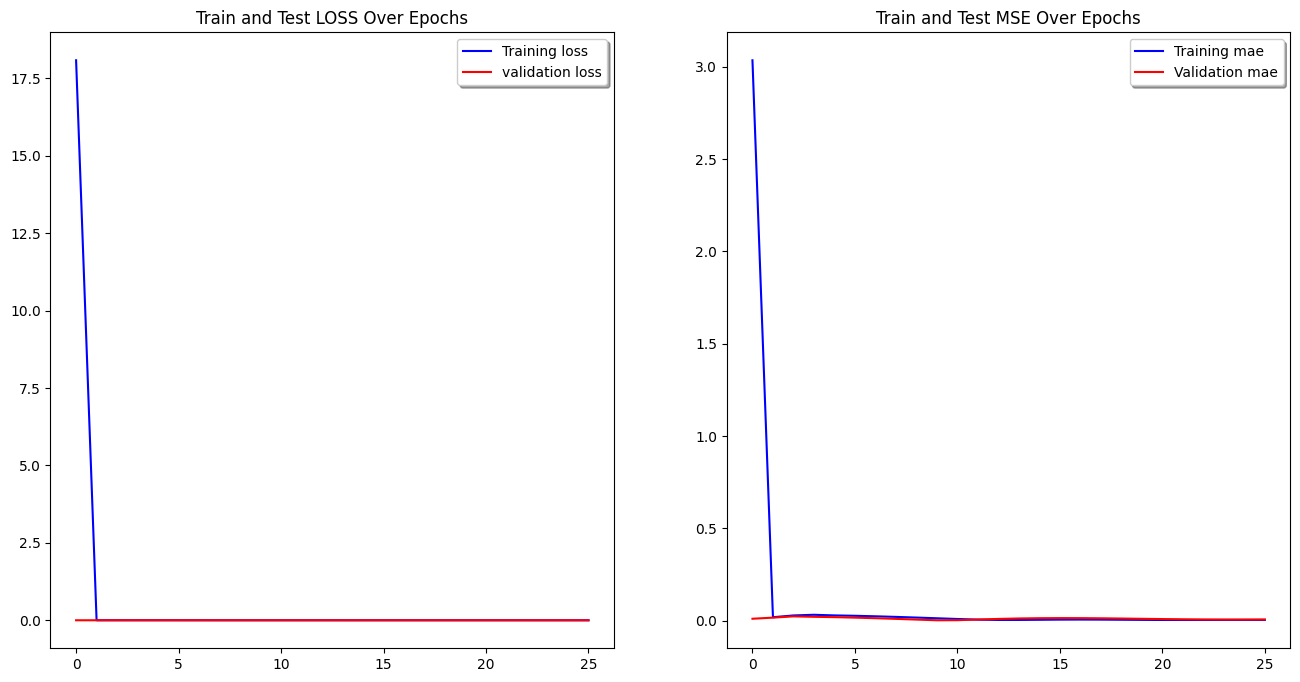

In [11]:
# Guardar el Modelo
#model.save('CNN_model_2048.h5')

#Load
#model = keras.model.load_model('CNN_model.h5')

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Train and Test LOSS Over Epochs')

ax[1].plot(history.history['mean_absolute_error'], color='b', label="Training mae")
ax[1].plot(history.history['val_mean_absolute_error'], color='r',label="Validation mae")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Train and Test MSE Over Epochs')

3/3 [==============================] - 0s 71ms/step


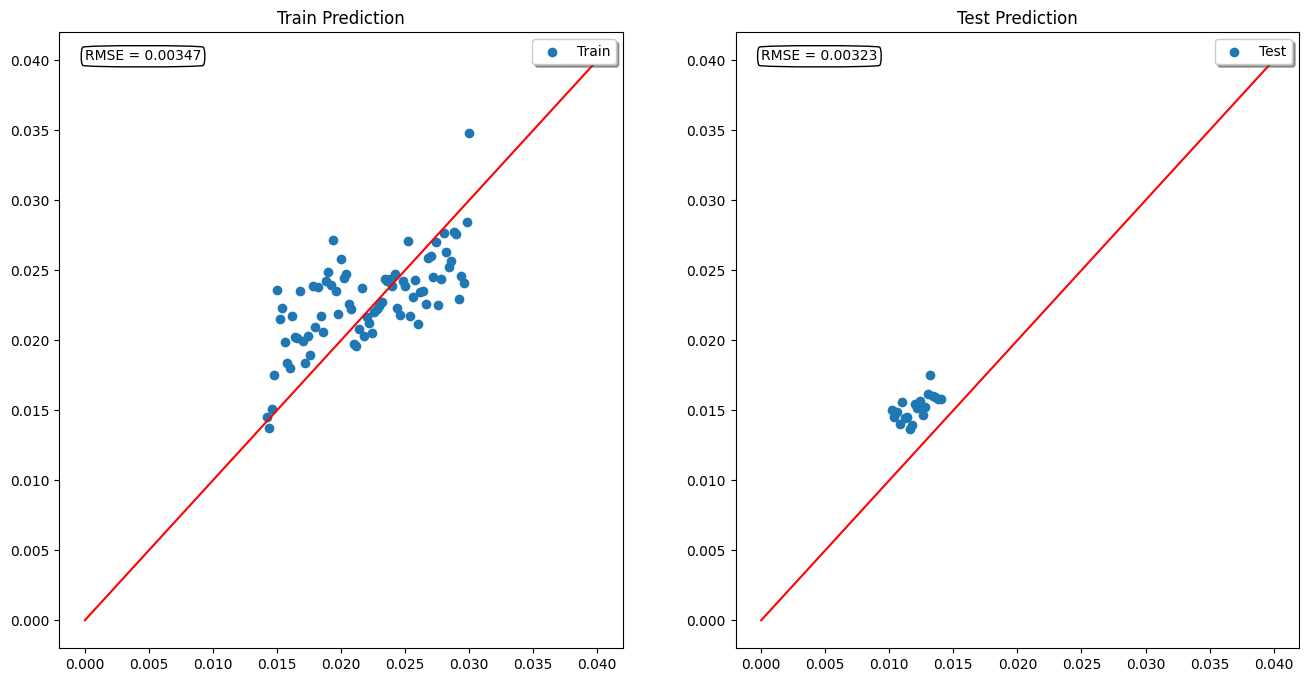

In [12]:
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#y_pred = scaler_target.inverse_transform(y_pred)

fig, ax = plt.subplots(1,2, figsize=(16,8))

line1 = [0,0.04]

ax[0].scatter(y_train[:80], y_pred_train, label='Train')
ax[0].plot(line1,line1, color = 'r')
legend = ax[0].legend(loc='upper right', shadow=True)
RMSE_train = MSE(y_train,y_pred_train)**0.5
ax[0].annotate("RMSE = " + str(round(RMSE_train,5)), (0,0.04), bbox=dict(boxstyle="round4", fc="w"))
ax[0].set_title('Train Prediction')


ax[1].scatter(y_test, y_pred_test, label='Test')
ax[1].plot(line1,line1, color = 'r')
legend = ax[1].legend(loc='upper right', shadow=True)
RMSE_test = MSE(y_test,y_pred_test)**0.5
ax[1].annotate("RMSE = " + str(round(RMSE_test,5)), (0,0.04), bbox=dict(boxstyle="round4", fc="w"))
ax[1].set_title('Test Prediction')

plt.show()

In [14]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 252, 252, 30)      780       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 30)        22530     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5880)              0         
                                                                 
 dense_3 (Dense)             (None, 120)              